In [1]:

!pip install ultralytics


  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: sympy
    Found existing installation: sympy 1.10.1
    Uninstalling sympy-1.10.1:
      Successfully uninstalled sympy-1.10.1


In [2]:
using_colab = True
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    # Download basic model 357.67M (b=basic, l=large, h=huge)    
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth 
     

PyTorch version: 2.5.1+cpu
Torchvision version: 0.20.1+cpu
CUDA is available: False


ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/segment-anything.git'"
--2024-11-07 09:40:26--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.187.125, 18.173.187.52, 18.173.187.109, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.187.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: 'sam_vit_b_01ec64.pth'

     0K .......... .......... .......... .......... ..........  0% 2.46M 2m26s
    50K .......... .......... .......... .......... ..........  0%  145M 74s
   100K .......... .......... .......... .......... ..........  0% 68.0M 51s
   150K .......... .......... .......... .......... ..........  0% 94.4M 39s
   200K .......... .......... .......... .......... ..........  0% 7.59M 41s
   250K .......... .......... .......... .......... ..........  0% 3.38M 52s
   300K ....

 13500K .......... .......... .......... .......... ..........  3% 20.3M 31s
 13550K .......... .......... .......... .......... ..........  3%  109M 31s
 13600K .......... .......... .......... .......... ..........  3% 19.5M 31s
 13650K .......... .......... .......... .......... ..........  3% 3.17M 31s
 13700K .......... .......... .......... .......... ..........  3% 20.5M 31s
 13750K .......... .......... .......... .......... ..........  3% 8.57M 31s
 13800K .......... .......... .......... .......... ..........  3% 17.0M 31s
 13850K .......... .......... .......... .......... ..........  3% 6.75M 31s
 13900K .......... .......... .......... .......... ..........  3% 29.2M 31s
 13950K .......... .......... .......... .......... ..........  3%  131M 31s
 14000K .......... .......... .......... .......... ..........  3% 96.8M 31s
 14050K .......... .......... .......... .......... ..........  3% 14.4M 31s
 14100K .......... .......... .......... .......... ..........  3% 11.8M 31s

In [3]:


import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import SamPredictor, sam_model_registry

 35050K .......... .......... .......... .......... ..........  9% 3.53M 29s
 35100K .......... .......... .......... .......... ..........  9% 12.4M 29s
 35150K .......... .......... .......... .......... ..........  9% 11.6M 29s
 35200K .......... .......... .......... .......... ..........  9% 9.05M 29s
 35250K .......... .......... .......... .......... ..........  9% 10.9M 29s
 35300K .......... .......... .......... .......... ..........  9%  101M 29s
 35350K .......... .......... .......... .......... ..........  9%  126M 29s
 35400K .......... .......... .......... .......... ..........  9% 37.8M 29s
 35450K .......... .......... .......... .......... ..........  9% 2.90M 29s
 35500K .......... .......... .......... .......... ..........  9% 27.4M 29s
 35550K .......... .......... .......... .......... ..........  9% 10.4M 29s
 35600K .......... .......... .......... .......... ..........  9% 16.4M 29s
 35650K .......... .......... .......... .......... ..........  9% 9.15M 29s

 73150K .......... .......... .......... .......... .......... 19% 99.3M 26s
 73200K .......... .......... .......... .......... .......... 19% 3.70M 26s
 73250K .......... .......... .......... .......... .......... 20% 19.9M 26s
 73300K .......... .......... .......... .......... .......... 20% 11.6M 26s
 73350K .......... .......... .......... .......... .......... 20% 13.8M 26s
 73400K .......... .......... .......... .......... .......... 20% 12.0M 26s
 73450K .......... .......... .......... .......... .......... 20% 9.08M 26s
 73500K .......... .......... .......... .......... .......... 20% 21.0M 26s
 73550K .......... .......... .......... .......... .......... 20%  164M 26s
 73600K .......... .......... .......... .......... .......... 20% 4.62M 26s
 73650K .......... .......... .......... .......... .......... 20% 8.99M 26s
 73700K .......... .......... .......... .......... .......... 20% 15.2M 26s
 73750K .......... .......... .......... .......... .......... 20% 14.9M 26s

124550K .......... .......... .......... .......... .......... 34% 14.5M 21s
124600K .......... .......... .......... .......... .......... 34% 11.4M 21s
124650K .......... .......... .......... .......... .......... 34% 10.9M 21s
124700K .......... .......... .......... .......... .......... 34% 3.40M 21s
124750K .......... .......... .......... .......... .......... 34% 9.22M 21s
124800K .......... .......... .......... .......... .......... 34% 16.5M 21s
124850K .......... .......... .......... .......... .......... 34% 96.5M 21s
124900K .......... .......... .......... .......... .......... 34% 86.7M 21s
124950K .......... .......... .......... .......... .......... 34% 20.6M 21s
125000K .......... .......... .......... .......... .......... 34% 3.36M 21s
125050K .......... .......... .......... .......... .......... 34% 14.7M 21s
125100K .......... .......... .......... .......... .......... 34% 14.5M 21s
125150K .......... .......... .......... .......... .......... 34% 7.32M 21s

178150K .......... .......... .......... .......... .......... 48% 12.6M 16s
178200K .......... .......... .......... .......... .......... 48% 11.2M 16s
178250K .......... .......... .......... .......... .......... 48% 10.4M 16s
178300K .......... .......... .......... .......... .......... 48% 16.9M 16s
178350K .......... .......... .......... .......... .......... 48% 8.96M 16s
178400K .......... .......... .......... .......... .......... 48% 3.86M 16s
178450K .......... .......... .......... .......... .......... 48%  120M 16s
178500K .......... .......... .......... .......... .......... 48%  185M 16s
178550K .......... .......... .......... .......... .......... 48% 11.8M 16s
178600K .......... .......... .......... .......... .......... 48% 14.1M 16s
178650K .......... .......... .......... .......... .......... 48% 11.4M 16s
178700K .......... .......... .......... .......... .......... 48% 11.4M 16s
178750K .......... .......... .......... .......... .......... 48% 8.97M 16s

224500K .......... .......... .......... .......... .......... 61% 99.4M 12s
224550K .......... .......... .......... .......... .......... 61% 3.74M 12s
224600K .......... .......... .......... .......... .......... 61% 71.3M 12s
224650K .......... .......... .......... .......... .......... 61% 77.9M 12s
224700K .......... .......... .......... .......... .......... 61% 4.07M 12s
224750K .......... .......... .......... .......... .......... 61% 90.1M 12s
224800K .......... .......... .......... .......... .......... 61% 88.8M 12s
224850K .......... .......... .......... .......... .......... 61% 12.7M 12s
224900K .......... .......... .......... .......... .......... 61% 13.7M 12s
224950K .......... .......... .......... .......... .......... 61% 11.7M 12s
225000K .......... .......... .......... .......... .......... 61% 10.8M 12s
225050K .......... .......... .......... .......... .......... 61% 10.8M 12s
225100K .......... .......... .......... .......... .......... 61% 12.1M 12s

247350K .......... .......... .......... .......... .......... 67% 11.2M 10s
247400K .......... .......... .......... .......... .......... 67% 9.22M 10s
247450K .......... .......... .......... .......... .......... 67% 18.3M 10s
247500K .......... .......... .......... .......... .......... 67%  102M 10s
247550K .......... .......... .......... .......... .......... 67% 46.4M 10s
247600K .......... .......... .......... .......... .......... 67% 7.59M 10s
247650K .......... .......... .......... .......... .......... 67% 38.3M 10s
247700K .......... .......... .......... .......... .......... 67% 3.17M 10s
247750K .......... .......... .......... .......... .......... 67% 14.3M 10s
247800K .......... .......... .......... .......... .......... 67% 19.4M 10s
247850K .......... .......... .......... .......... .......... 67% 8.12M 10s
247900K .......... .......... .......... .......... .......... 67% 84.6M 10s
247950K .......... .......... .......... .......... .......... 67% 89.3M 10s

295950K .......... .......... .......... .......... .......... 80%  116M 6s
296000K .......... .......... .......... .......... .......... 80% 11.3M 6s
296050K .......... .......... .......... .......... .......... 80% 11.8M 6s
296100K .......... .......... .......... .......... .......... 80% 3.16M 6s
296150K .......... .......... .......... .......... .......... 80% 19.2M 6s
296200K .......... .......... .......... .......... .......... 80% 11.4M 6s
296250K .......... .......... .......... .......... .......... 80% 11.7M 6s
296300K .......... .......... .......... .......... .......... 80%  106M 6s
296350K .......... .......... .......... .......... .......... 80% 79.9M 6s
296400K .......... .......... .......... .......... .......... 80% 15.1M 6s
296450K .......... .......... .......... .......... .......... 80% 3.18M 6s
296500K .......... .......... .......... .......... .......... 80% 14.0M 6s
296550K .......... .......... .......... .......... .......... 80% 15.4M 6s
296600K ....

322800K .......... .......... .......... .......... .......... 88%  109M 4s
322850K .......... .......... .......... .......... .......... 88%  103M 4s
322900K .......... .......... .......... .......... .......... 88% 13.0M 4s
322950K .......... .......... .......... .......... .......... 88% 3.16M 4s
323000K .......... .......... .......... .......... .......... 88% 22.4M 4s
323050K .......... .......... .......... .......... .......... 88% 15.0M 4s
323100K .......... .......... .......... .......... .......... 88% 10.6M 4s
323150K .......... .......... .......... .......... .......... 88% 11.5M 4s
323200K .......... .......... .......... .......... .......... 88%  139M 4s
323250K .......... .......... .......... .......... .......... 88%  120M 4s
323300K .......... .......... .......... .......... .......... 88% 11.4M 4s
323350K .......... .......... .......... .......... .......... 88% 3.29M 4s
323400K .......... .......... .......... .......... .......... 88% 16.7M 4s
323450K ....

346750K .......... .......... .......... .......... .......... 94%  170M 2s
346800K .......... .......... .......... .......... .......... 94%  333M 2s
346850K .......... .......... .......... .......... .......... 94% 18.7M 2s
346900K .......... .......... .......... .......... .......... 94% 3.56M 2s
346950K .......... .......... .......... .......... .......... 94% 11.3M 2s
347000K .......... .......... .......... .......... .......... 94% 16.0M 2s
347050K .......... .......... .......... .......... .......... 94% 11.0M 2s
347100K .......... .......... .......... .......... .......... 94% 6.42M 2s
347150K .......... .......... .......... .......... .......... 94% 92.0M 2s
347200K .......... .......... .......... .......... .......... 94%  123M 2s
347250K .......... .......... .......... .......... .......... 94% 3.70M 2s
347300K .......... .......... .......... .......... .......... 94% 21.6M 2s
347350K .......... .......... .......... .......... .......... 94% 11.2M 2s
347400K ....

In [4]:

from ultralytics import YOLO

# Load a model
model_path = 'yolov8n.pt' # YOLO pretrained model or your own custom model
model = YOLO(model_path)  # load a pretrained model 6.23M

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\karishma.thumu\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 11.9MB/s]


In [8]:
# Use the model
image_path = r'C:\Users\karishma.thumu\segment-anything\input_img.jpg'
results = model.predict(image_path, save=True)  # predict on an image
results[0].boxes.data


image 1/1 C:\Users\karishma.thumu\segment-anything\input_img.jpg: 352x640 1 cat, 2891.0ms
Speed: 10.9ms preprocess, 2891.0ms inference, 5.5ms postprocess per image at shape (1, 3, 352, 640)
Results saved to C:\Users\karishma.thumu\runs\detect\predict


tensor([[297.9393,  22.6489, 760.1842, 607.0775,   0.8998,  15.0000]])

In [9]:
# change this section accordin to your data requirement
my_box = np.array([])
for i, item in enumerate(results[0].cpu().numpy()):
  if item.boxes.cls == 15:  # pick the first box for detected object, class 15 (i.e. cat)
    my_box = item.boxes.xyxy
    break
my_box[0].astype('int').tolist()

[297, 22, 760, 607]

In [10]:

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
sam_checkpoint = r'C:\Users\karishma.thumu\segment-anything\sam_vit_b_01ec64.pth'
model_type = "vit_b"

device = "cpu" 

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [12]:
predictor.set_image(image)

In [13]:

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=my_box[None, :],
    multimask_output=False,
)

In [14]:

# helper functions 

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image) 
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

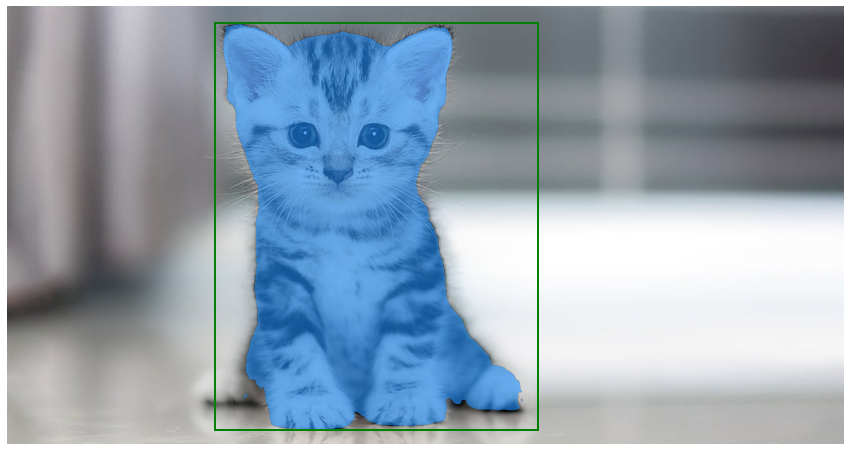

In [15]:
plt.figure(figsize=(15, 15))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(my_box[0], plt.gca())
plt.axis('off')
plt.show()